## Tarea 1: Análisis Estadístico Descriptivo


Introducción
Este notebook presenta un análisis estadístico completo de un conjunto de datos. El objetivo es aplicar las técnicas fundamentales de la estadística descriptiva para caracterizar la distribución, tendencia central, dispersión, forma y posición de los datos, culminando en una interpretación integral de sus propiedades.

### 1. Preparación del Entorno y Carga de Datos
En esta primera sección, importaremos las librerías de Python que son esenciales para el análisis numérico y la visualización, como Pandas, NumPy, Matplotlib, Seaborn y SciPy. Posteriormente, se definirán o cargarán los datos que serán objeto de este estudio.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px


df = pd.read_csv(r"D:\STATICS_AI\Iris.csv")

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5



### 2. Distribución de Frecuencias y Gráficos
El primer paso del análisis es agrupar los datos para entender cómo se distribuyen sus frecuencias.

2.1. Tabla de Distribución de Frecuencias (8 Clases)
Para construir la tabla, primero debemos determinar el rango, el número de clases (8, según el requisito) y la amplitud de cada clase. Con estos valores, construiremos los intervalos y calcularemos las frecuencias correspondientes (absoluta, acumulada, relativa y relativa acumulada).


### --- Paso 1: Recolectar la variable cuantitativa ---
Cargamos el dataset y seleccionamos nuestra variable de interés.


In [7]:
data = df['SepalLengthCm']
print(f"Se han cargado {len(data)} registros.\n")

Se han cargado 150 registros.



### --- Paso 2: Ordenar los datos y determinar el rango ---

In [8]:
print("Paso 2: Calculando el rango de los datos")
valor_minimo = data.min()
valor_maximo = data.max()
rango = valor_maximo - valor_minimo
print(f"Valor Mínimo: {valor_minimo}")
print(f"Valor Máximo: {valor_maximo}")
print(f"Rango (R): {rango:.2f}\n")

Paso 2: Calculando el rango de los datos
Valor Mínimo: 4.3
Valor Máximo: 7.9
Rango (R): 3.60



### --- Paso 3: Elegir el número de clases (k) con la Regla de Sturges ---

In [9]:
print("Paso 3: Determinando el número de clases (k) con la Regla de Sturges")
n = len(data)
k = 1 + 3.322 * np.log10(n)
k = int(round(k)) # Redondeamos al entero más cercano
print(f"Número de registros (n): {n}")
print(f"Número de clases calculado (k = 1 + 3.322 * log10(n)): {k:.4f}")
print(f"Número de clases a utilizar (redondeado): {k}\n")

Paso 3: Determinando el número de clases (k) con la Regla de Sturges
Número de registros (n): 150
Número de clases calculado (k = 1 + 3.322 * log10(n)): 8.0000
Número de clases a utilizar (redondeado): 8



### --- Paso 4: Calcular la amplitud del intervalo ---

In [10]:
print("Paso 4: Calculando la amplitud del intervalo de clase")
amplitud = rango / k
# A menudo se redondea hacia arriba para asegurar que todos los datos queden cubiertos.
# Usaremos un redondeo a un decimal para tener límites manejables.
amplitud = np.ceil(amplitud * 10) / 10 
print(f"Amplitud calculada (Rango / k): {rango / k:.4f}")
print(f"Amplitud a utilizar (redondeada hacia arriba): {amplitud}\n")

Paso 4: Calculando la amplitud del intervalo de clase
Amplitud calculada (Rango / k): 0.4500
Amplitud a utilizar (redondeada hacia arriba): 0.5



### --- Paso 5: Establecer los intervalos de clase ---

In [11]:
print("Paso 5: Definiendo los límites de cada clase")
limites = np.arange(valor_minimo, valor_maximo + amplitud, amplitud)
print("Límites de los intervalos:")
print(limites)
print("\n")


Paso 5: Definiendo los límites de cada clase
Límites de los intervalos:
[4.3 4.8 5.3 5.8 6.3 6.8 7.3 7.8 8.3]




### --- Paso 6: Contar cuántos datos caen en cada intervalo (Frecuencia Absoluta) ---


In [12]:
print("Paso 6 y 7: Construyendo la Tabla de Distribución de Frecuencias Completa\n")

# Usamos pd.cut para agrupar los datos en los intervalos que definimos.
intervalos = pd.cut(data, bins=limites, right=False, include_lowest=True)

# Frecuencia Absoluta (fi)
freq_abs = intervalos.value_counts().sort_index()

# Marca de Clase (xi) - el punto medio de cada intervalo
marcas_clase = [(interval.left + interval.right) / 2 for interval in freq_abs.index]

# Frecuencia Acumulada (Fi)
freq_acum = freq_abs.cumsum()

# Frecuencia Relativa (hi)
freq_rel = freq_abs / n

# Frecuencia Relativa Acumulada (Hi)
freq_rel_acum = freq_rel.cumsum()

# Construimos el DataFrame final para la tabla
tabla_frecuencias = pd.DataFrame({
    'Intervalo de Clase': freq_abs.index,
    'Marca de Clase (xi)': marcas_clase,
    'Frecuencia Absoluta (fi)': freq_abs.values,
    'Frecuencia Acumulada (Fi)': freq_acum.values,
    'Frecuencia Relativa (hi)': freq_rel.values,
    'Frecuencia Relativa Acum. (Hi)': freq_rel_acum.values
})

# Mostramos la tabla final
print(tabla_frecuencias.to_string())


Paso 6 y 7: Construyendo la Tabla de Distribución de Frecuencias Completa

  Intervalo de Clase  Marca de Clase (xi)  Frecuencia Absoluta (fi)  Frecuencia Acumulada (Fi)  Frecuencia Relativa (hi)  Frecuencia Relativa Acum. (Hi)
0         [4.3, 4.8)                 4.55                        11                         11                  0.073333                        0.073333
1         [4.8, 5.3)                 5.05                        34                         45                  0.226667                        0.300000
2         [5.3, 5.8)                 5.55                        28                         73                  0.186667                        0.486667
3         [5.8, 6.3)                 6.05                        26                         99                  0.173333                        0.660000
4         [6.3, 6.8)                 6.55                        31                        130                  0.206667                        0.866667
5      

2.2. Histograma de Frecuencias Absolutas
El histograma es la representación visual de la tabla de frecuencias. Nos permite observar de forma gráfica la forma, el centro y la dispersión de los datos.



Generando el histograma...


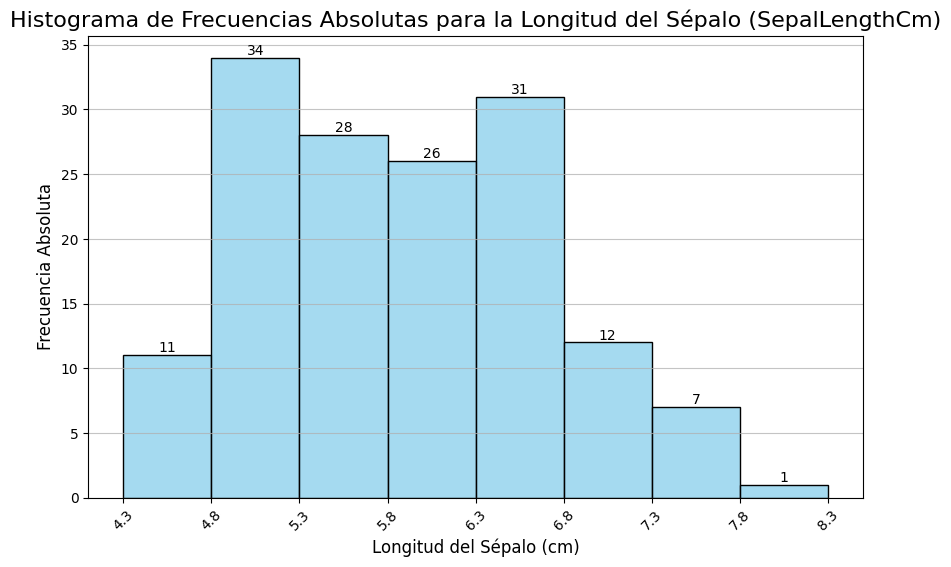

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


print("\nGenerando el histograma...")

plt.figure(figsize=(10, 6))
sns.histplot(data, bins=limites, kde=False, color='skyblue', edgecolor='black')

plt.title('Histograma de Frecuencias Absolutas para la Longitud del Sépalo (SepalLengthCm)', fontsize=16)
plt.xlabel('Longitud del Sépalo (cm)', fontsize=12)
plt.ylabel('Frecuencia Absoluta', fontsize=12)
plt.xticks(limites, rotation=45)
plt.grid(axis='y', alpha=0.75)

# Añadir etiquetas de frecuencia sobre cada barra
for rect in plt.gca().patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    if y_value > 0:
        plt.annotate(f'{int(y_value)}', (x_value, y_value), ha='center', va='bottom', fontsize=10)

plt.show()

### Histogramas de frecuencia absoluta de las cuatro clases del Dtaset con Plotly

In [ ]:
print("\n--- Generando Gráficos de Distribución por Especie con Plotly ---")

# Lista de las columnas numéricas que queremos visualizar
columnas_numericas = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# --- Gráfico 1: Histogramas por Especie ---
print("\nGenerando histogramas superpuestos por especie...")
for columna in columnas_numericas:
    fig_hist = px.histogram(
        df,
        x=columna,
        color="Species",  # El parámetro clave para separar por especie
        marginal="box",   # Muestra box plots para cada especie
        opacity=0.7,      # Ajusta la opacidad para ver las superposiciones
        barmode='overlay', # Superpone los histogramas
        title=f'Distribución de {columna} por Especie'
    )
    
    fig_hist.update_layout(
        xaxis_title=f'{columna} (cm)',
        yaxis_title='Frecuencia Absoluta'
    )
    fig_hist.show()



--- Generando Histogramas de Frecuencias Absolutas con Plotly ---

Procesando y graficando para: SepalLengthCm



Procesando y graficando para: SepalWidthCm



Procesando y graficando para: PetalLengthCm



Procesando y graficando para: PetalWidthCm


### 2.3. Polígono de Frecuencias
Superpuesto al histograma, el polígono de frecuencias une los puntos medios de la parte superior de cada barra, ayudando a visualizar la forma de la distribución de manera más suave.


In [21]:
from plotly.subplots import make_subplots


print("\n--- Generando Polígonos de Frecuencias Absolutas con Plotly ---")

# Lista de las columnas numéricas que queremos visualizar
columnas_numericas = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# --- Gráfico 1: Subplots para cada variable ---
print("\nGenerando polígonos individuales en subplots...")
fig_subplots = make_subplots(
    rows=2, cols=2,
    subplot_titles=columnas_numericas
)

# Iteramos para añadir cada polígono a su subplot correspondiente
for i, columna in enumerate(columnas_numericas):
    # Calcular parámetros y frecuencias para la columna actual
    data_actual = df[columna]
    n = len(data_actual)
    k = int(round(1 + 3.322 * np.log10(n)))
    rango = data_actual.max() - data_actual.min()
    if k == 0: k = 1
    amplitud = np.ceil((rango / k) * 10) / 10
    if amplitud == 0: amplitud = 0.1
    limites = np.arange(data_actual.min(), data_actual.max() + amplitud, amplitud)
    intervalos = pd.cut(data_actual, bins=limites, right=False, include_lowest=True)
    freq_abs = intervalos.value_counts().sort_index()
    marcas_clase = [interval.mid for interval in freq_abs.index]

    # Añadir el trazo (polígono) al subplot
    fig_subplots.add_trace(go.Scatter(
        x=marcas_clase,
        y=freq_abs.values,
        mode='lines+markers',
        name=columna
    ), row=(i // 2) + 1, col=(i % 2) + 1)

# Actualizar el diseño general de los subplots
fig_subplots.update_layout(
    height=800, width=1000,
    title_text="Polígonos de Frecuencias Absolutas Individuales",
    showlegend=False
)
fig_subplots.show()


# --- Gráfico 2: Todos los polígonos en una sola gráfica ---
print("\nGenerando gráfico combinado con todos los polígonos...")
fig_combinada = go.Figure()

# Iteramos sobre cada columna para añadir su polígono a la misma figura
for columna in columnas_numericas:
    # Calcular parámetros y frecuencias para la columna actual
    data_actual = df[columna]
    n = len(data_actual)
    k = int(round(1 + 3.322 * np.log10(n)))
    rango = data_actual.max() - data_actual.min()
    if k == 0: k = 1
    amplitud = np.ceil((rango / k) * 10) / 10
    if amplitud == 0: amplitud = 0.1
    limites = np.arange(data_actual.min(), data_actual.max() + amplitud, amplitud)
    intervalos = pd.cut(data_actual, bins=limites, right=False, include_lowest=True)
    freq_abs = intervalos.value_counts().sort_index()
    marcas_clase = [interval.mid for interval in freq_abs.index]
    
    # Añadir el trazo (polígono) a la figura combinada
    fig_combinada.add_trace(go.Scatter(
        x=marcas_clase,
        y=freq_abs.values,
        mode='lines+markers',
        name=columna  # El nombre es crucial para la leyenda
    ))

# Actualizar el diseño del gráfico combinado
fig_combinada.update_layout(
    title='Comparación de Polígonos de Frecuencias para las Variables de Iris',
    xaxis_title='Medida (cm)',
    yaxis_title='Frecuencia Absoluta',
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    legend_title='Variable'
)
fig_combinada.show()




--- Generando Polígonos de Frecuencias Absolutas con Plotly ---

Generando polígonos individuales en subplots...



Generando gráfico combinado con todos los polígonos...


In [ ]:

2.4. Ojiva
La ojiva, o polígono de frecuencias acumuladas, es una gráfica que muestra la frecuencia acumulada. Es especialmente útil para estimar percentiles y determinar rápidamente cuántos datos se encuentran por debajo de un cierto valor.

3. Medidas de Tendencia Central
Estas medidas nos indican el valor "típico" o central de nuestro conjunto de datos.

Media Aritmética: El promedio clásico.

Media Geométrica: Útil para tasas de crecimiento.

Media Armónica: Útil para promediar tasas y velocidades.

Media Recortada (5% en cada extremo): Un promedio más robusto que elimina la influencia de los valores extremos.

Mediana: El valor que se encuentra justo en el centro de los datos ordenados.

Moda: El valor que aparece con mayor frecuencia.

4. Medidas de Dispersión
Estas medidas cuantifican qué tan "esparcidos" o "concentrados" están los datos respecto al centro.

Rango: La diferencia entre el valor máximo y el mínimo.

Desviación Absoluta Media: El promedio de las desviaciones absolutas respecto a la media.

Varianza: El promedio de las desviaciones al cuadrado.

Desviación Estándar: La raíz cuadrada de la varianza. Es la medida de dispersión más común.

Coeficiente de Variación: La desviación estándar dividida por la media. Útil para comparar la dispersión de datasets con diferentes escalas.

5. Medidas de Forma
El sesgo y la curtosis describen la forma de la distribución de nuestros datos en comparación con una distribución normal.

Sesgo (Skewness): Mide la asimetría de la distribución.

Curtosis (Kurtosis): Mide qué tan "puntiaguda" o "achatada" es la distribución y el peso de sus colas.

6. Medidas de Posición y Análisis de Outliers
Estas herramientas nos ayudan a entender la posición relativa de los datos y a identificar valores atípicos.

Cuartiles y Deciles: Valores que dividen los datos ordenados en 4 y 10 partes iguales, respectivamente.

Outliers (Valores Atípicos): Se identificarán los outliers leves y extremos utilizando el método del rango intercuartílico (IQR).

Diagrama de Caja y Bigote (Box Plot): Una visualización poderosa que resume la distribución, la tendencia central, la dispersión y muestra explícitamente los outliers.

7. Conclusión General
Aquí, basado en todos los análisis anteriores, redacta una conclusión sobre las características principales del conjunto de datos. ¿Es simétrico o sesgado? ¿Qué tan dispersos están los datos? ¿Existen valores atípicos significativos y cuál podría ser su implicación?

SyntaxError: invalid syntax (2234213821.py, line 1)